In [98]:
import pandas as pd
import warnings

# Ignorar warnings
warnings.filterwarnings("ignore")

# Define os nomes das colunas e as larguras de cada campo
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['Data', 'Codigo', 'Preco_Abertura', 'Preco_Fechamento']

# Carrega o arquivo
df_1 = pd.read_fwf('../COTAHIST_A2023.TXT', colspecs=colspecs, names=names, header=None)
df_2 = pd.read_fwf('../COTAHIST_A2022.TXT', colspecs=colspecs, names=names, header=None)
df_3 = pd.read_fwf('../COTAHIST_A2024.TXT', colspecs=colspecs, names=names, header=None)
# Filtra pela ação VALE3, garantindo que seja exatamente VALE3 (sem caracteres adicionais)
mxrf11_df1 = df_1[df_1['Codigo'].str.endswith('MXRF11')]
mxrf11_df2 = df_2[df_2['Codigo'].str.endswith('MXRF11')]
mxrf11_df3 = df_3[df_3['Codigo'].str.endswith('MXRF11')]


In [99]:
#Concatenando os df
df = pd.concat([mxrf11_df1,mxrf11_df2])

df.head(20)
print(df)

,Data,Codigo,Preco_Abertura,Preco_Fechamento
433,20230102,12MXRF11,999.0,999.0
2035,20230103,12MXRF11,1006.0,1003.0
3766,20230104,12MXRF11,1008.0,1004.0
5270,20230105,12MXRF11,1010.0,1004.0
6968,20230106,12MXRF11,1010.0,1010.0
8648,20230109,12MXRF11,1014.0,1008.0
10308,20230110,12MXRF11,1011.0,1011.0
11872,20230111,12MXRF11,1011.0,1011.0
13704,20230112,12MXRF11,1013.0,1011.0
15373,20230113,12MXRF11,1012.0,1012.0


In [100]:
#Formatando as datas

df['Data'] = pd.to_datetime(df['Data'], format='%Y%m%d')

# Extraindo ano, mês e dia
df['Ano'] = df['Data'].dt.year
df['Mes'] = df['Data'].dt.month
df['Dia'] = df['Data'].dt.day

print(df)

              Data    Codigo  Preco_Abertura  Preco_Fechamento   Ano  Mes  Dia
433     2023-01-02  12MXRF11           999.0             999.0  2023    1    2
2035    2023-01-03  12MXRF11          1006.0            1003.0  2023    1    3
3766    2023-01-04  12MXRF11          1008.0            1004.0  2023    1    4
5270    2023-01-05  12MXRF11          1010.0            1004.0  2023    1    5
6968    2023-01-06  12MXRF11          1010.0            1010.0  2023    1    6
...            ...       ...             ...               ...   ...  ...  ...
1225334 2022-11-03  12MXRF11          1021.0            1020.0  2022   11    3
1228369 2022-12-07  12MXRF11          1000.0            1000.0  2022   12    7
1228976 2022-10-27  12MXRF11          1024.0            1021.0  2022   10   27
1230420 2022-11-17  12MXRF11          1016.0            1000.0  2022   11   17
1234052 2022-11-22  12MXRF11          1008.0            1005.0  2022   11   22

[498 rows x 7 columns]


In [101]:
#Definindo a coluna data como index da tabela
df = df.sort_values(by='Data')
df.set_index(df['Data'],inplace=True)



In [102]:
# Calculando a média móvel para obter a tendência com min_periods=1
tendencia = df['Preco_Fechamento'].rolling(window=498, min_periods=1).mean()
print(tendencia)


Data
2022-01-03     991.000000
2022-01-04     991.500000
2022-01-05     991.666667
2022-01-06     991.750000
2022-01-07     991.400000
                 ...     
2023-12-21    1013.062753
2023-12-22    1013.131313
2023-12-26    1013.197581
2023-12-27    1013.265594
2023-12-28    1013.337349
Name: Preco_Fechamento, Length: 498, dtype: float64


In [103]:
# Calculando a sazonalidade subtraindo a tendência da série original
sazonalidade = df['Preco_Fechamento'] - tendencia
print(sazonalidade)

Data
2022-01-03     0.000000
2022-01-04     0.500000
2022-01-05     0.333333
2022-01-06     0.250000
2022-01-07    -1.400000
                ...    
2023-12-21    30.937247
2023-12-22    33.868687
2023-12-26    32.802419
2023-12-27    33.734406
2023-12-28    35.662651
Name: Preco_Fechamento, Length: 498, dtype: float64


In [104]:
# Calculando o ruído subtraindo a soma da tendência e da sazonalidade da série original
ruido = df['Preco_Fechamento'] - (tendencia + sazonalidade)
print(ruido)

Data
2022-01-03    0.0
2022-01-04    0.0
2022-01-05    0.0
2022-01-06    0.0
2022-01-07    0.0
             ... 
2023-12-21    0.0
2023-12-22    0.0
2023-12-26    0.0
2023-12-27    0.0
2023-12-28    0.0
Name: Preco_Fechamento, Length: 498, dtype: float64


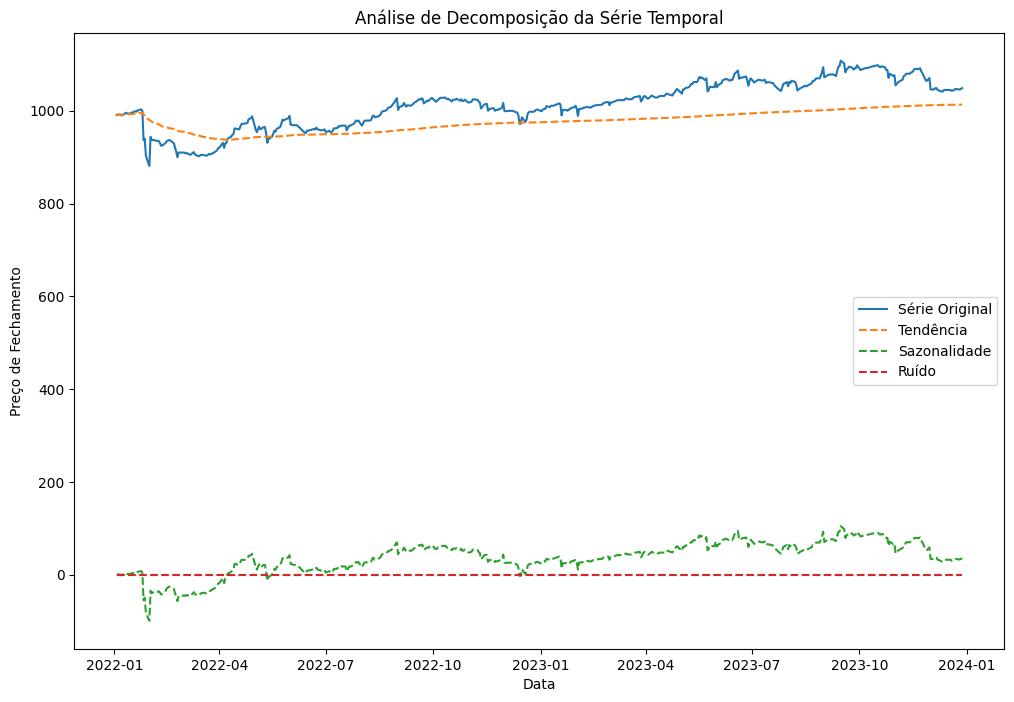

In [105]:
import matplotlib.pyplot as plt
# Visualizando os componentes de tendência, sazonalidade e ruído
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Preco_Fechamento'], label='Série Original')
plt.plot(df.index, tendencia, label='Tendência', linestyle='--')
plt.plot(df.index, sazonalidade, label='Sazonalidade', linestyle='--')
plt.plot(df.index, ruido, label='Ruído', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Análise de Decomposição da Série Temporal')
plt.legend()
plt.show()

In [106]:
#Suavaisando a base 
media_movel = df['Preco_Fechamento'].rolling(window=498).mean()
suavizacao_exponencial = df['Preco_Fechamento'].ewm(alpha=0.2, adjust=False).mean()
df['Suavizacao'] = suavizacao_exponencial


In [107]:
tendencia_suavizada = df['Suavizacao'].rolling(window=300, min_periods=1).mean()

sazonalidade_suavizada = df['Suavizacao'] - tendencia

ruido_suavizada = df['Suavizacao'] - (tendencia + sazonalidade)


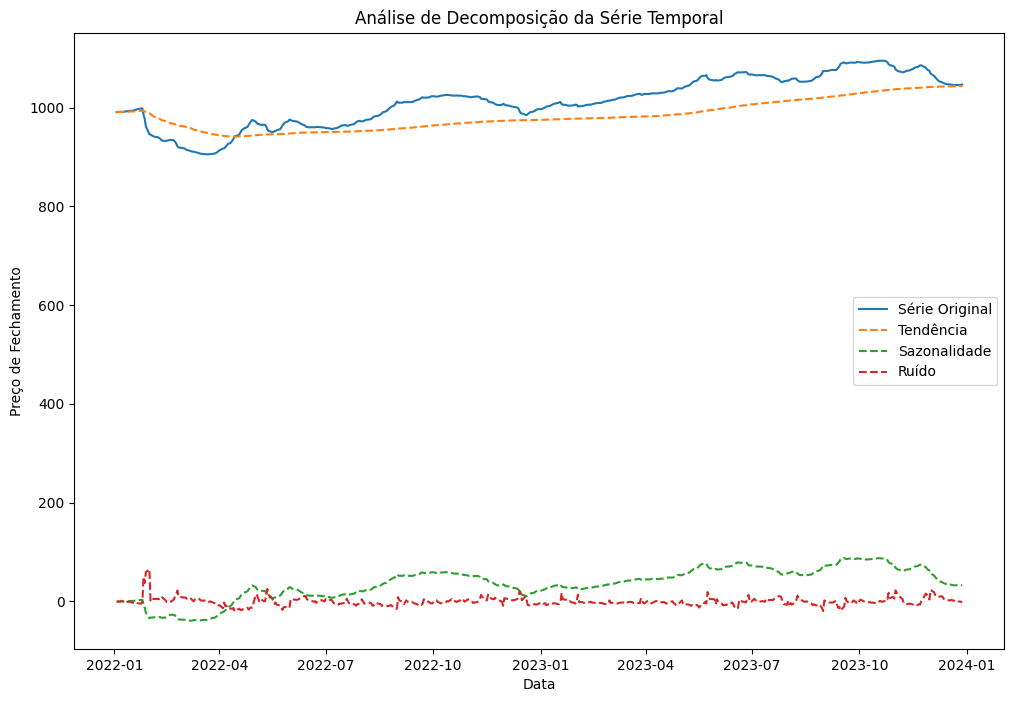

In [108]:
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Suavizacao'], label='Série Original')
plt.plot(df.index, tendencia_suavizada, label='Tendência', linestyle='--')
plt.plot(df.index, sazonalidade_suavizada, label='Sazonalidade', linestyle='--')
plt.plot(df.index, ruido_suavizada, label='Ruído', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Análise de Decomposição da Série Temporal')
plt.legend()
plt.show()

In [109]:
# Calcular a média e o desvio padrão
mean_price = df['Preco_Fechamento'].mean()
std_price = df['Preco_Fechamento'].std()

# Calcular o Z-score
df['Z-score'] = (df['Preco_Fechamento'] - mean_price) / std_price

# Visualizar o DataFrame com o Z-score calculado
print(df)

                 Data    Codigo  Preco_Abertura  Preco_Fechamento   Ano  Mes  \
Data                                                                           
2022-01-03 2022-01-03  12MXRF11           995.0             991.0  2022    1   
2022-01-04 2022-01-04  12MXRF11           993.0             992.0  2022    1   
2022-01-05 2022-01-05  12MXRF11           994.0             992.0  2022    1   
2022-01-06 2022-01-06  12MXRF11           992.0             992.0  2022    1   
2022-01-07 2022-01-07  12MXRF11           992.0             990.0  2022    1   
...               ...       ...             ...               ...   ...  ...   
2023-12-21 2023-12-21  12MXRF11          1045.0            1044.0  2023   12   
2023-12-22 2023-12-22  12MXRF11          1048.0            1047.0  2023   12   
2023-12-26 2023-12-26  12MXRF11          1047.0            1046.0  2023   12   
2023-12-27 2023-12-27  12MXRF11          1047.0            1047.0  2023   12   
2023-12-28 2023-12-28  12MXRF11         

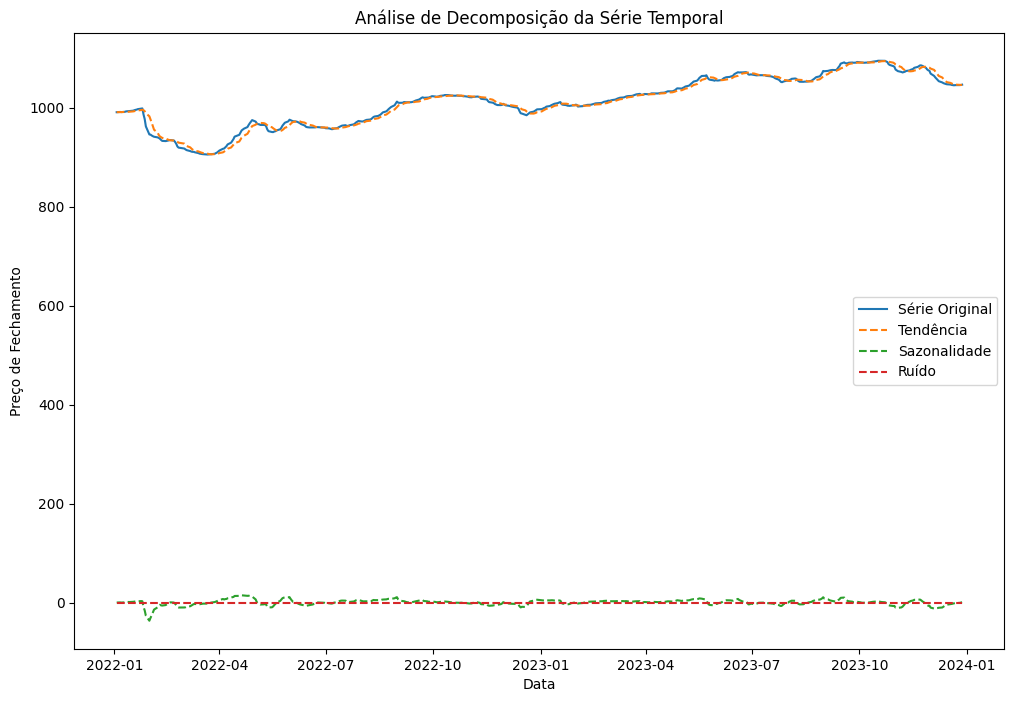

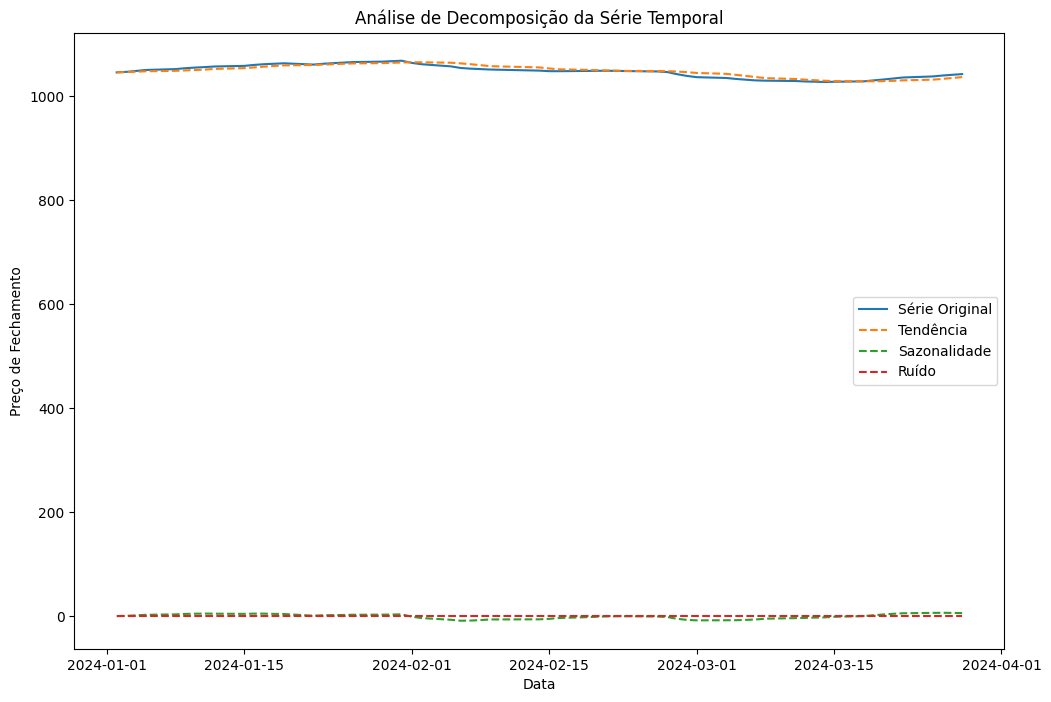

,Data,Codigo,Preco_Abertura,Preco_Fechamento,Ano,Mes,Dia,Suavizacao,Z-score
Data,,,,,,,,,
2024-01-02,2024-01-02,12MXRF11,1051.0,1046.0,2024,1,2,1046.000,-0.111701
2024-01-03,2024-01-03,12MXRF11,1051.0,1051.0,2024,1,3,1047.000,0.232428
2024-01-04,2024-01-04,12MXRF11,1058.0,1056.0,2024,1,4,1048.800,0.576556
2024-01-05,2024-01-05,12MXRF11,1058.0,1058.0,2024,1,5,1050.640,0.714207
2024-01-08,2024-01-08,12MXRF11,1059.0,1059.0,2024,1,8,1052.312,0.783033


In [110]:
def preprocessamento_df(df):
    
    # Concatenar os DataFrames
    # Formatando as datas
    df['Data'] = pd.to_datetime(df['Data'], format='%Y%m%d')

    # Extraindo ano, mês e dia
    df['Ano'] = df['Data'].dt.year
    df['Mes'] = df['Data'].dt.month
    df['Dia'] = df['Data'].dt.day
    
    # Ordenar o DataFrame pela data
    df = df.sort_values(by='Data')
    df.set_index(df['Data'], inplace=True)

    
    # Suavização
    df['Suavizacao'] = df['Preco_Fechamento'].ewm(alpha=0.2, adjust=False).mean()
    
    # Componentes de Decomposição
    linhas = df.shape[1]
    tendencia_suavizada = df['Suavizacao'].rolling(window=linhas, min_periods=1).mean()
    sazonalidade_suavizada = df['Suavizacao'] - tendencia_suavizada
    ruido_suavizado = df['Suavizacao'] - (tendencia_suavizada + sazonalidade_suavizada)

    # Calcular a média e o desvio padrão
    mean_price = df['Preco_Fechamento'].mean()
    std_price = df['Preco_Fechamento'].std()

    # Calcular o Z-score
    df['Z-score'] = (df['Preco_Fechamento'] - mean_price) / std_price
    
    # Plot dos componentes de decomposição
    plt.figure(figsize=(12, 8))
    plt.plot(df.index, df['Suavizacao'], label='Série Original')
    plt.plot(df.index, tendencia_suavizada, label='Tendência', linestyle='--')
    plt.plot(df.index, sazonalidade_suavizada, label='Sazonalidade', linestyle='--')
    plt.plot(df.index, ruido_suavizado, label='Ruído', linestyle='--')
    plt.xlabel('Data')
    plt.ylabel('Preço de Fechamento')
    plt.title('Análise de Decomposição da Série Temporal')
    plt.legend()
    plt.show()
    
    return df

# Aplicando a função preprocessamento_df nos DataFrames mxrf11_df1 e mxrf11_df2
df_treino = preprocessamento_df(pd.concat([mxrf11_df1, mxrf11_df2]))
df_teste = preprocessamento_df(mxrf11_df3)
df_treino.head()
df_teste.head()

In [111]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
# Suponha que 'df' seja o seu DataFrame de treinamento e 'df2' seja o DataFrame de teste

# Treinamento do modelo ARIMA - Sem Suavisação
modelo = ARIMA(df_treino['Preco_Fechamento'], order=(5,1,0))  # Definindo a ordem do modelo ARIMA (p, d, q)
modelo_treinado = modelo.fit()

# Previsão com o modelo ARIMA
previsao = modelo_treinado.predict(start=len(df_treino), end=len(df_treino) + len(df_teste) - 1, typ='levels')

# Avaliação da Acurácia
mse = mean_squared_error(df_teste['Preco_Fechamento'], previsao)
rmse = np.sqrt(mse)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse)

Raiz do Erro Quadrático Médio (RMSE): 14.421563874397341


In [112]:
#Suavisado 
modelo = ARIMA(df_treino['Suavizacao'], order=(5,1,0))  # Definindo a ordem do modelo ARIMA (p, d, q)
modelo_treinado = modelo.fit()

# Previsão com o modelo ARIMA
previsao = modelo_treinado.predict(start=len(df_treino), end=len(df_treino) + len(df_teste) - 1, typ='levels')

# Avaliação da Acurácia
mse = mean_squared_error(df_teste['Suavizacao'], previsao)
rmse = np.sqrt(mse)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse)

Raiz do Erro Quadrático Médio (RMSE): 12.252342139169553
